<a href="https://colab.research.google.com/github/oyajisama/Machine-Learning-Project-Analyse-de-sentiments-des-avis-clients-de-Ryanair/blob/main/Analyse_des_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
# Read in data
df = pd.read_csv("cleaned_ryanair_review_df (1).csv")


In [ ]:
df.head()

Column1 Date Published  Overall Rating Passenger Country  Trip_verified  \
0      0.0     03/02/2024            10.0    United Kingdom   Not Verified   
1      1.0     26/01/2024            10.0    United Kingdom  Trip Verified   
2      2.0     20/01/2024            10.0    United Kingdom  Trip Verified   
3      3.0     07/01/2024             6.0    United Kingdom  Trip Verified   
4      4.0     06/01/2024            10.0            Israel  Trip Verified   

                              Comment title  \
0         "bang on time and smooth flights"   
1          "Another good affordable flight"   
2                       “Really impressed!”   
3          “a decent offering from Ryanair”   
4  “cabin crew were welcoming and friendly”   

                                              review        Aircraft  \
0  Flew back Faro London Luton Friday 2nd Februar...  Boeing 737 900   
1  Another good affordable flight Ryanair . time ...             NaN   
2  Really impressed ! get pay , flight cost £19.9...  Boeing 737-800   
3  like review flight Faro Liverpool Ryanair . bo...      Boeing 737   
4  Flight left gate ahead schedule , fare really ...  Boeing 737-800   

  Type Of Traveller      Seat Type  ...     Destination  Date Flown  \
0    Family Leisure  Economy Class  ...           Luton  01/02/2024   
1    Couple Leisure  Economy Class  ...        Alicante  01/01/2024   
2    Couple Leisure  Economy Class  ...  Paris Beauvais  01/10/2023   
3      Solo Leisure  Economy Class  ...       Liverpool  01/01/2024   
4      Solo Leisure  Economy Class  ...      Manchester  01/01/2024   

  Seat Comfort  Cabin Staff Service Food & Beverages Ground Service  \
0          4.0                  5.0              3.0            4.0   
1          3.0                  5.0              3.0            5.0   
2          5.0                  5.0              4.0            5.0   
3          3.0                  2.0              1.0            3.0   
4          4.0                  5.0              NaN            4.0   

   Value For Money Recommended Inflight Entertainment  Wifi & Connectivity  
0              4.0         yes                    NaN                  NaN  
1              5.0         yes                    NaN                  NaN  
2              5.0         yes                    NaN                  NaN  
3              3.0         yes                    NaN                  NaN  
4              5.0         yes                    NaN                  NaN  

[5 rows x 21 columns]

In [ ]:
print(df.shape)

(2263, 21)


In [ ]:
df.columns

Index(['Column1', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'review', 'Aircraft',
       'Type Of Traveller', 'Seat Type', 'Origin', 'Destination', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Value For Money', 'Recommended',
       'Inflight Entertainment', 'Wifi & Connectivity'],
      dtype='object')

In [ ]:
df = df.dropna(subset=['review'])

# Data Visualisation

print(df.shape)

In [ ]:
df['Overall Rating'].value_counts().sort_index()

Overall Rating
1.0     855
2.0     184
3.0     101
4.0      57
5.0      83
6.0      74
7.0     121
8.0     198
9.0     177
10.0    261
Name: count, dtype: int64

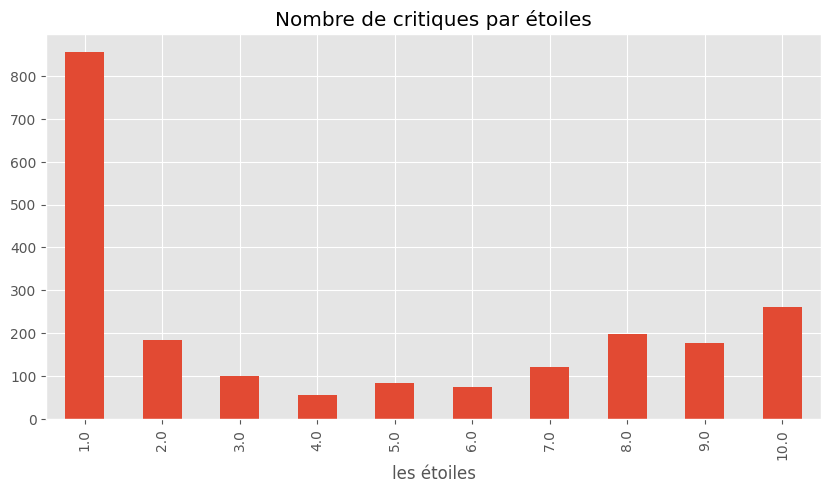

In [ ]:
ax = df['Overall Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Nombre de critiques par étoiles',
          figsize=(10, 5))
ax.set_xlabel('les étoiles')
plt.show()

In [ ]:
example = df['review'][59]
print(example)

Delayed reason another . flight bombarded commercials , try sell anything possible . Horrible airline , recommended unless desperate .


tokens = nltk.word_tokenize(example)
tokens

#tokens[:10]

# VADER Seniment Scoring
This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Télécharger les données nécessaires pour NLTK si ce n'est pas déjà fait
nltk.download('vader_lexicon')

# Initialiser l'analyseur de sentiment
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:

df['review'][55]

"unreasonable policies impose excessively punitive fines n't follow letter . ca n't bring small hand luggage ( backpack ) . need pay priority bring small hand luggage . backpack , way back claimed bigger allowed . put box , claimed n't quite fit . charged £80 backpack . refused accept cash refused accept apple pay . Even though willing pay , made effort help ready prevent boarding , unless paid credit card . gave credit card claimed n't accepted . log bank account show took money . let board seconds gate closed . asked receipt . printer broken said would email . n't . argument flights cheap , entitled treat passengers way ."

In [ ]:
sia.polarity_scores(df['review'][5])

{'neg': 0.086, 'neu': 0.822, 'pos': 0.092, 'compound': 0.1583}

In [ ]:
df['review'][50]

"recently missed flight France staff member gate called final boarding would n't let , even though 60 seconds behind sister let flight . steps still attached plane , doors open , people still finding seats , yet staff gate refused boarding . mentioned called final boarding ( gate closed , final boarding ) response `` n't listen announcement '' . pay hotel another flight next morning . 've complained Ryanair 've sent generic response getting airport 2 hours early . 3 hours early seconds behind passenger ."

In [ ]:
sia.polarity_scores(df['review'][50])

{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.7579}

Ce dictionnaire contient les scores de sentiment calculés par l'analyseur de sentiment VADER (Valence Aware Dictionary and sEntiment Reasoner) pour un texte donné. Voici ce que signifient ces scores :

'neg': 0.117 : Cela indique que 11,7 % des mots du texte sont perçus comme négatifs.
'neu': 0.547 : Cela indique que 54,7 % des mots du texte sont perçus comme neutres.
'pos': 0.336 : Cela indique que 33,6 % des mots du texte sont perçus comme positifs.
'compound': 0.8413 : C'est une mesure composite du sentiment qui est calculée en agrégeant les scores des trois catégories (négatif, neutre et positif). Ce score est compris entre -1 (extrêmement négatif) et +1 (extrêmement positif). Dans ce cas, le score compound est de 0.8413, ce qui indique un sentiment global très positif.

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    myid = row['Column1']
    if isinstance(text, str):  # Vérifiez si 'text' est une chaîne de caractères
        res[myid] = sia.polarity_scores(text)
    else:
        print(f"La valeur de 'text' pour l'index {i} n'est pas une chaîne de caractères.")


  0%|          | 0/2249 [00:00<?, ?it/s]

In [ ]:
res

{0.0: {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9524},
 1.0: {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.7351},
 2.0: {'neg': 0.117, 'neu': 0.547, 'pos': 0.336, 'compound': 0.8413},
 3.0: {'neg': 0.066, 'neu': 0.795, 'pos': 0.139, 'compound': 0.8442},
 4.0: {'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.8402},
 5.0: {'neg': 0.086, 'neu': 0.822, 'pos': 0.092, 'compound': 0.1583},
 6.0: {'neg': 0.16, 'neu': 0.591, 'pos': 0.249, 'compound': 0.8791},
 7.0: {'neg': 0.141, 'neu': 0.724, 'pos': 0.135, 'compound': 0.1531},
 8.0: {'neg': 0.345, 'neu': 0.504, 'pos': 0.151, 'compound': -0.8715},
 9.0: {'neg': 0.124, 'neu': 0.78, 'pos': 0.097, 'compound': 0.3769},
 10.0: {'neg': 0.041, 'neu': 0.736, 'pos': 0.222, 'compound': 0.8958},
 11.0: {'neg': 0.248, 'neu': 0.629, 'pos': 0.123, 'compound': -0.6705},
 12.0: {'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4404},
 13.0: {'neg': 0.123, 'neu': 0.776, 'pos': 0.101, 'compound': -0.351},
 14.0: {'neg': 0.107, '

In [ ]:
pd.DataFrame(res).T

neg    neu    pos  compound
0.0     0.000  0.699  0.301    0.9524
1.0     0.000  0.708  0.292    0.7351
2.0     0.117  0.547  0.336    0.8413
3.0     0.066  0.795  0.139    0.8442
4.0     0.000  0.679  0.321    0.8402
...       ...    ...    ...       ...
2244.0  0.024  0.751  0.225    0.9675
2245.0  0.133  0.755  0.112   -0.4374
2246.0  0.149  0.763  0.089   -0.5267
2247.0  0.090  0.792  0.117    0.2500
2248.0  0.128  0.737  0.135    0.1027

[2249 rows x 4 columns]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Column1'})
vaders = vaders.merge(df, how='left')

**Now we have sentiment score and metadata**

In [ ]:

vaders.head()

Column1    neg    neu    pos  compound Date Published  Overall Rating  \
0      0.0  0.000  0.699  0.301    0.9524     03/02/2024            10.0   
1      1.0  0.000  0.708  0.292    0.7351     26/01/2024            10.0   
2      2.0  0.117  0.547  0.336    0.8413     20/01/2024            10.0   
3      3.0  0.066  0.795  0.139    0.8442     07/01/2024             6.0   
4      4.0  0.000  0.679  0.321    0.8402     06/01/2024            10.0   

  Passenger Country  Trip_verified                             Comment title  \
0    United Kingdom   Not Verified         "bang on time and smooth flights"   
1    United Kingdom  Trip Verified          "Another good affordable flight"   
2    United Kingdom  Trip Verified                       “Really impressed!”   
3    United Kingdom  Trip Verified          “a decent offering from Ryanair”   
4            Israel  Trip Verified  “cabin crew were welcoming and friendly”   

   ...     Destination  Date Flown Seat Comfort Cabin Staff Service  \
0  ...           Luton  01/02/2024          4.0                 5.0   
1  ...        Alicante  01/01/2024          3.0                 5.0   
2  ...  Paris Beauvais  01/10/2023          5.0                 5.0   
3  ...       Liverpool  01/01/2024          3.0                 2.0   
4  ...      Manchester  01/01/2024          4.0                 5.0   

  Food & Beverages Ground Service Value For Money  Recommended  \
0              3.0            4.0             4.0          yes   
1              3.0            5.0             5.0          yes   
2              4.0            5.0             5.0          yes   
3              1.0            3.0             3.0          yes   
4              NaN            4.0             5.0          yes   

  Inflight Entertainment Wifi & Connectivity  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                    NaN                 NaN  
3                    NaN                 NaN  
4                    NaN                 NaN  

[5 rows x 25 columns]

# Analyse exploratoire des scores composés générés par VADER :

<ipython-input-23-513f9f2e72f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vaders, x='Overall Rating', y='compound', palette='viridis')


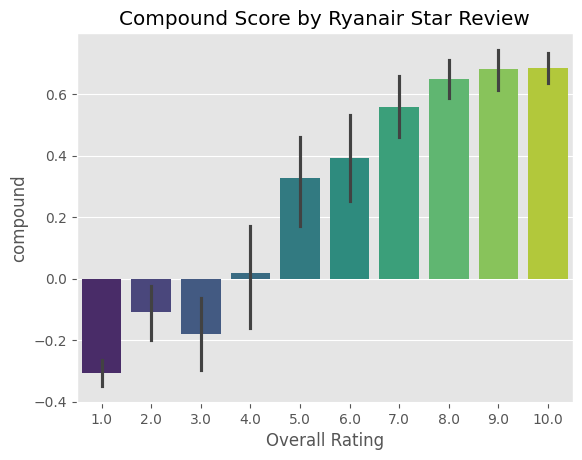

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer le barplot avec une palette de couleurs
ax = sns.barplot(data=vaders, x='Overall Rating', y='compound', palette='viridis')

ax.set_title('Compound Score by Ryanair Star Review')
plt.show()


<ipython-input-24-581da8e2f392>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Overall Rating', y='pos', ax=axs[0], palette='Greens')
<ipython-input-24-581da8e2f392>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Overall Rating', y='neu', ax=axs[1], palette='Blues')
<ipython-input-24-581da8e2f392>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Overall Rating', y='neg', ax=axs[2], palette='Reds')


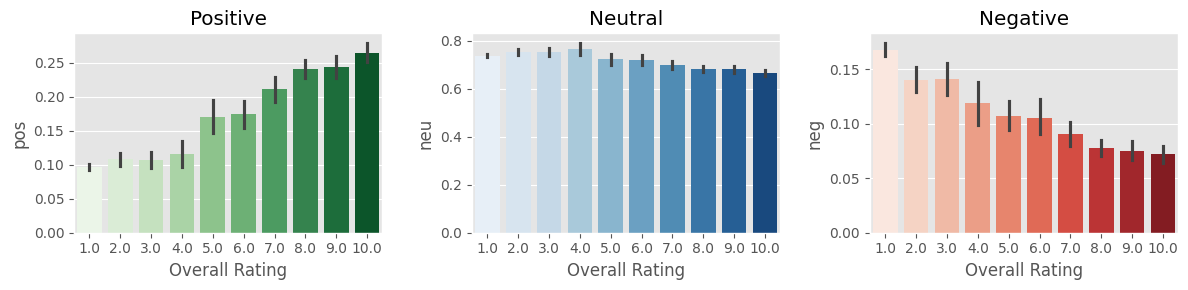

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Graphique des scores positifs avec une palette verte
sns.barplot(data=vaders, x='Overall Rating', y='pos', ax=axs[0], palette='Greens')
axs[0].set_title('Positive')

# Graphique des scores neutres avec une palette bleue
sns.barplot(data=vaders, x='Overall Rating', y='neu', ax=axs[1], palette='Blues')
axs[1].set_title('Neutral')

# Graphique des scores négatifs avec une palette rouge
sns.barplot(data=vaders, x='Overall Rating', y='neg', ax=axs[2], palette='Reds')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()


positive sentiment: compound score >= 0.05

neutral sentiment: (compound score > -0.05) and (compound score < 0.05)

negative sentiment: compound score <= -0.05

# Génération d'un nuage de mots en fonction de chaque aspect des avis clients :


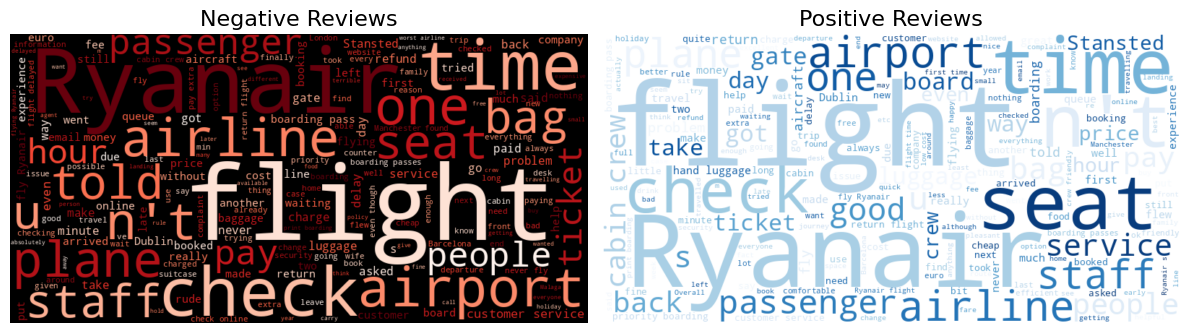

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews based on compound scores
negative_reviews = vaders[vaders['compound'] <= 0.05]['review']
positive_reviews = vaders[vaders['compound'] > 0.05]['review']

# Combine all reviews into single text for word clouds
negative_text = " ".join(negative_reviews)
positive_text = " ".join(positive_reviews)

# Generate word clouds
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_text)

# Plot word clouds
plt.figure(figsize=(12, 6))

# Negative word cloud
plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews', fontsize=16)

# Positive word cloud
plt.subplot(1, 2, 2)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews', fontsize=16)

plt.tight_layout()
plt.show()


Percentage of Negative Reviews: 36.16%
Percentage of Positive Reviews: 63.84%


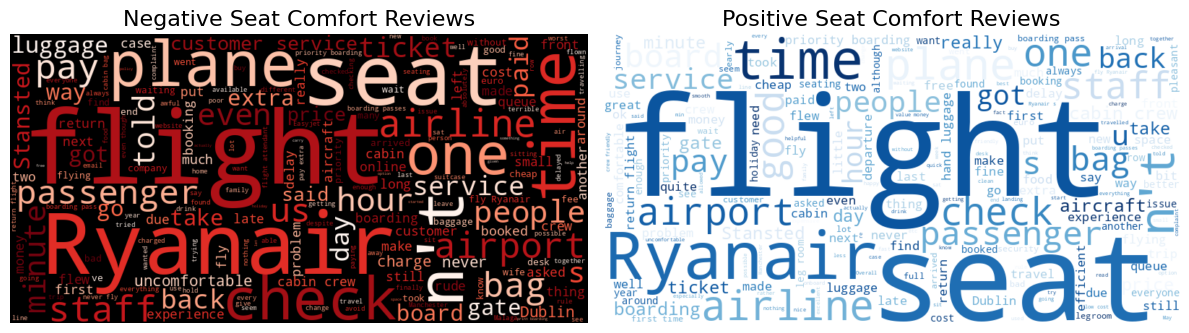

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define keywords related to seat comfort
keywords = ["seat", "comfort", "seating", "comfortable", "spacious"]

# Function to filter reviews based on keywords
def filter_seat_comfort_reviews(text):
    return any(keyword in text.lower() for keyword in keywords)

# Filter reviews related to seat comfort
vaders['related_to_seat_comfort'] = vaders['review'].apply(filter_seat_comfort_reviews)

# Filter reviews based on compound scores and seat comfort relevance
negative_reviews = vaders[(vaders['compound'] <= 0.05) & (vaders['related_to_seat_comfort'])]
positive_reviews = vaders[(vaders['compound'] > 0.05) & (vaders['related_to_seat_comfort'])]

# Calculate percentages
total_reviews = vaders['related_to_seat_comfort'].sum()  # Total reviews mentioning seat comfort
negative_percentage = (len(negative_reviews) / total_reviews) * 100
positive_percentage = (len(positive_reviews) / total_reviews) * 100

# Print percentages
print(f"Percentage of Negative Reviews: {negative_percentage:.2f}%")
print(f"Percentage of Positive Reviews: {positive_percentage:.2f}%")

# Combine all reviews into single text for word clouds
negative_text = " ".join(negative_reviews['review'])
positive_text = " ".join(positive_reviews['review'])

# Generate word clouds
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_text)

# Plot word clouds
plt.figure(figsize=(12, 6))

# Negative word cloud
plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Seat Comfort Reviews', fontsize=16)

# Positive word cloud
plt.subplot(1, 2, 2)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Seat Comfort Reviews', fontsize=16)

plt.tight_layout()
plt.show()


Percentage of Negative Cabin Staff Service Reviews: 42.33%
Percentage of Positive Cabin Staff Service Reviews: 57.67%


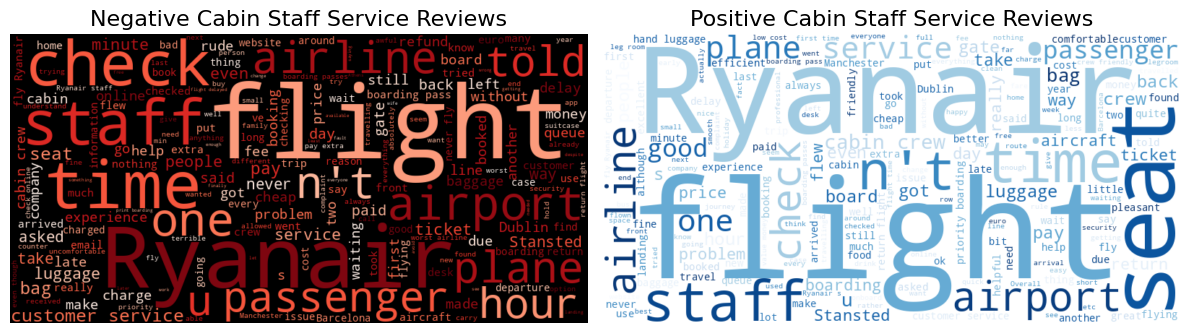

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define keywords related to cabin staff service
keywords_cabin_staff = ["staff", "service", "cabin crew", "crew", "flight attendants", "attendants", "service quality"]

# Function to filter reviews based on keywords for cabin staff service
def filter_cabin_staff_reviews(text):
    return any(keyword in text.lower() for keyword in keywords_cabin_staff)

# Filter reviews related to cabin staff service
vaders['related_to_cabin_staff'] = vaders['review'].apply(filter_cabin_staff_reviews)

# Filter reviews based on compound scores and cabin staff service relevance
negative_cabin_staff_reviews = vaders[(vaders['compound'] <= 0.05) & (vaders['related_to_cabin_staff'])]
positive_cabin_staff_reviews = vaders[(vaders['compound'] > 0.05) & (vaders['related_to_cabin_staff'])]

# Calculate percentages for cabin staff service
total_cabin_staff_reviews = vaders['related_to_cabin_staff'].sum()  # Total reviews mentioning cabin staff service
negative_cabin_staff_percentage = (len(negative_cabin_staff_reviews) / total_cabin_staff_reviews) * 100
positive_cabin_staff_percentage = (len(positive_cabin_staff_reviews) / total_cabin_staff_reviews) * 100

# Print percentages for cabin staff service
print(f"Percentage of Negative Cabin Staff Service Reviews: {negative_cabin_staff_percentage:.2f}%")
print(f"Percentage of Positive Cabin Staff Service Reviews: {positive_cabin_staff_percentage:.2f}%")

# Combine all reviews into single text for word clouds
negative_cabin_staff_text = " ".join(negative_cabin_staff_reviews['review'])
positive_cabin_staff_text = " ".join(positive_cabin_staff_reviews['review'])

# Generate word clouds for cabin staff service
negative_cabin_staff_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_cabin_staff_text)
positive_cabin_staff_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_cabin_staff_text)

# Plot word clouds for cabin staff service
plt.figure(figsize=(12, 6))

# Negative word cloud for cabin staff
plt.subplot(1, 2, 1)
plt.imshow(negative_cabin_staff_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Cabin Staff Service Reviews', fontsize=16)

# Positive word cloud for cabin staff
plt.subplot(1, 2, 2)
plt.imshow(positive_cabin_staff_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Cabin Staff Service Reviews', fontsize=16)

plt.tight_layout()
plt.show()


Percentage of Negative Value for Money Reviews: 41.79%
Percentage of Positive Value for Money Reviews: 58.21%


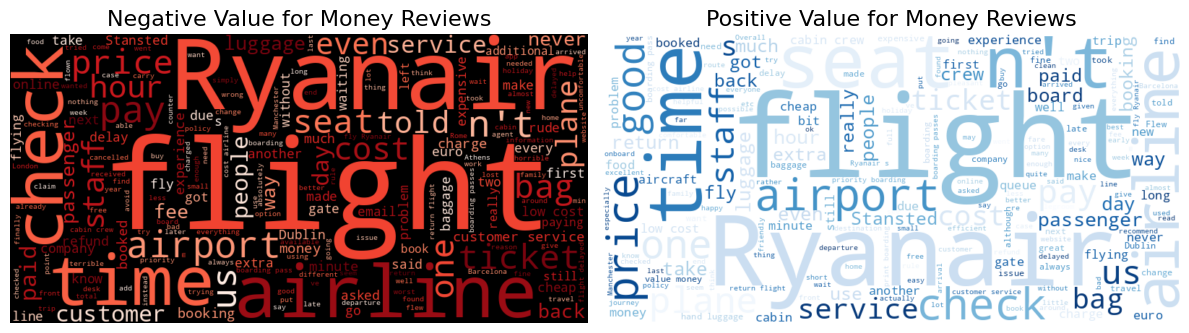

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define keywords related to value for money
keywords_value_for_money = ["value for money", "value", "price", "affordable", "cost", "expensive", "worth it", "priceworthy"]

# Function to filter reviews based on keywords for value for money
def filter_value_for_money_reviews(text):
    return any(keyword in text.lower() for keyword in keywords_value_for_money)

# Filter reviews related to value for money
vaders['related_to_value_for_money'] = vaders['review'].apply(filter_value_for_money_reviews)

# Filter reviews based on compound scores and value for money relevance
negative_value_for_money_reviews = vaders[(vaders['compound'] <= 0.05) & (vaders['related_to_value_for_money'])]
positive_value_for_money_reviews = vaders[(vaders['compound'] > 0.05) & (vaders['related_to_value_for_money'])]

# Calculate percentages for value for money
total_value_for_money_reviews = vaders['related_to_value_for_money'].sum()  # Total reviews mentioning value for money
negative_value_for_money_percentage = (len(negative_value_for_money_reviews) / total_value_for_money_reviews) * 100
positive_value_for_money_percentage = (len(positive_value_for_money_reviews) / total_value_for_money_reviews) * 100

# Print percentages for value for money
print(f"Percentage of Negative Value for Money Reviews: {negative_value_for_money_percentage:.2f}%")
print(f"Percentage of Positive Value for Money Reviews: {positive_value_for_money_percentage:.2f}%")

# Combine all reviews into single text for word clouds
negative_value_for_money_text = " ".join(negative_value_for_money_reviews['review'])
positive_value_for_money_text = " ".join(positive_value_for_money_reviews['review'])

# Generate word clouds for value for money
negative_value_for_money_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_value_for_money_text)
positive_value_for_money_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_value_for_money_text)

# Plot word clouds for value for money
plt.figure(figsize=(12, 6))

# Negative word cloud for value for money
plt.subplot(1, 2, 1)
plt.imshow(negative_value_for_money_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Value for Money Reviews', fontsize=16)

# Positive word cloud for value for money
plt.subplot(1, 2, 2)
plt.imshow(positive_value_for_money_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Value for Money Reviews', fontsize=16)

plt.tight_layout()
plt.show()


Percentage of Negative Quality Reviews: 44.12%
Percentage of Positive Quality Reviews: 55.88%


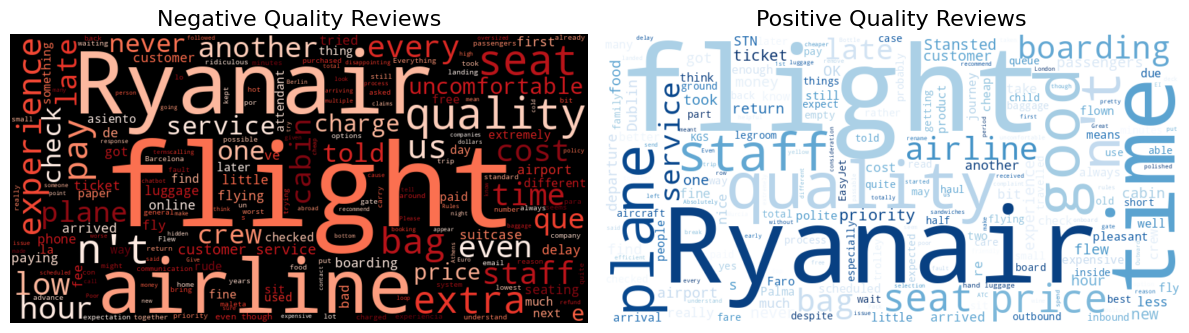

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define keywords related to quality
keywords_quality = ["quality", "good quality", "high quality", "poor quality", "quality of service", "quality of product", "bad quality", "excellent quality"]

# Function to filter reviews based on keywords for quality
def filter_quality_reviews(text):
    return any(keyword in text.lower() for keyword in keywords_quality)

# Filter reviews related to quality
vaders['related_to_quality'] = vaders['review'].apply(filter_quality_reviews)

# Filter reviews based on compound scores and quality relevance
negative_quality_reviews = vaders[(vaders['compound'] <= 0.05) & (vaders['related_to_quality'])]
positive_quality_reviews = vaders[(vaders['compound'] > 0.05) & (vaders['related_to_quality'])]

# Calculate percentages for quality
total_quality_reviews = vaders['related_to_quality'].sum()  # Total reviews mentioning quality
negative_quality_percentage = (len(negative_quality_reviews) / total_quality_reviews) * 100
positive_quality_percentage = (len(positive_quality_reviews) / total_quality_reviews) * 100

# Print percentages for quality
print(f"Percentage of Negative Quality Reviews: {negative_quality_percentage:.2f}%")
print(f"Percentage of Positive Quality Reviews: {positive_quality_percentage:.2f}%")

# Combine all reviews into single text for word clouds
negative_quality_text = " ".join(negative_quality_reviews['review'])
positive_quality_text = " ".join(positive_quality_reviews['review'])

# Generate word clouds for quality
negative_quality_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_quality_text)
positive_quality_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_quality_text)

# Plot word clouds for quality
plt.figure(figsize=(12, 6))

# Negative word cloud for quality
plt.subplot(1, 2, 1)
plt.imshow(negative_quality_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Quality Reviews', fontsize=16)

# Positive word cloud for quality
plt.subplot(1, 2, 2)
plt.imshow(positive_quality_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Quality Reviews', fontsize=16)

plt.tight_layout()
plt.show()


Percentage of Negative Extra Features Reviews: 43.45%
Percentage of Positive Extra Features Reviews: 56.55%


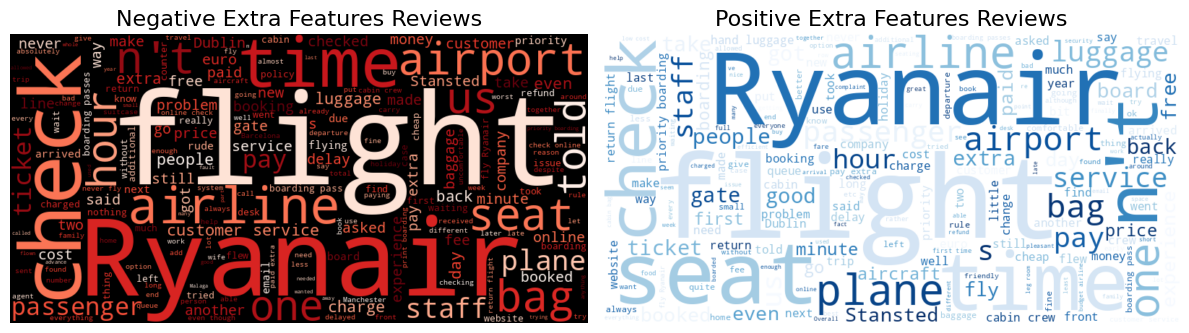

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define keywords related to extra features
keywords_extra = ["extra", "perks", "additional", "bonus", "free", "complimentary", "extras", "included", "gift", "surprise"]

# Function to filter reviews based on keywords for extra features
def filter_extra_reviews(text):
    return any(keyword in text.lower() for keyword in keywords_extra)

# Filter reviews related to extra features
vaders['related_to_extra'] = vaders['review'].apply(filter_extra_reviews)

# Filter reviews based on compound scores and extra features relevance
negative_extra_reviews = vaders[(vaders['compound'] <= 0.05) & (vaders['related_to_extra'])]
positive_extra_reviews = vaders[(vaders['compound'] > 0.05) & (vaders['related_to_extra'])]

# Calculate percentages for extra features
total_extra_reviews = vaders['related_to_extra'].sum()  # Total reviews mentioning extra features
negative_extra_percentage = (len(negative_extra_reviews) / total_extra_reviews) * 100
positive_extra_percentage = (len(positive_extra_reviews) / total_extra_reviews) * 100

# Print percentages for extra features
print(f"Percentage of Negative Extra Features Reviews: {negative_extra_percentage:.2f}%")
print(f"Percentage of Positive Extra Features Reviews: {positive_extra_percentage:.2f}%")

# Combine all reviews into single text for word clouds
negative_extra_text = " ".join(negative_extra_reviews['review'])
positive_extra_text = " ".join(positive_extra_reviews['review'])

# Generate word clouds for extra features
negative_extra_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_extra_text)
positive_extra_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_extra_text)

# Plot word clouds for extra features
plt.figure(figsize=(12, 6))

# Negative word cloud for extra features
plt.subplot(1, 2, 1)
plt.imshow(negative_extra_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Extra Features Reviews', fontsize=16)

# Positive word cloud for extra features
plt.subplot(1, 2, 2)
plt.imshow(positive_extra_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Extra Features Reviews', fontsize=16)

plt.tight_layout()
plt.show()


Percentage of Negative Business Class Reviews: 18.75%
Percentage of Positive Business Class Reviews: 81.25%


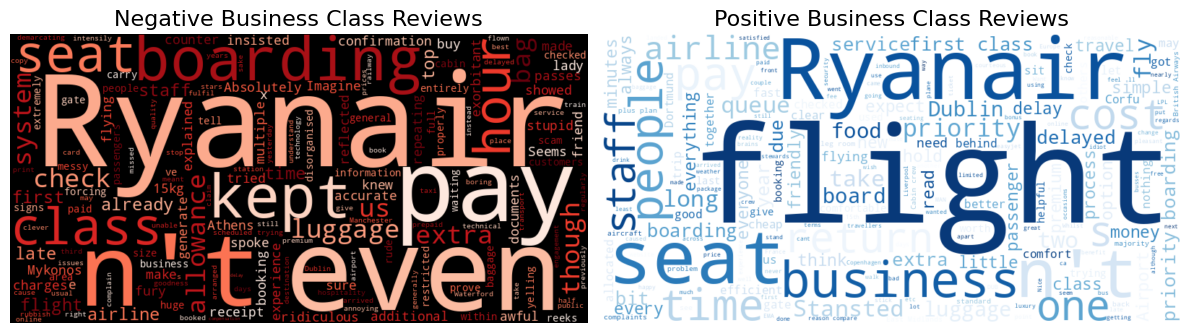

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define keywords related to business class
keywords_business_class = ["business class", "first class", "premium class", "business seat", "premium seat", "business cabin", "first class seat", "business service"]

# Function to filter reviews based on keywords for business class
def filter_business_class_reviews(text):
    return any(keyword in text.lower() for keyword in keywords_business_class)

# Filter reviews related to business class
vaders['related_to_business_class'] = vaders['review'].apply(filter_business_class_reviews)

# Filter reviews based on compound scores and business class relevance
negative_business_class_reviews = vaders[(vaders['compound'] <= 0.05) & (vaders['related_to_business_class'])]
positive_business_class_reviews = vaders[(vaders['compound'] > 0.05) & (vaders['related_to_business_class'])]

# Calculate percentages for business class
total_business_class_reviews = vaders['related_to_business_class'].sum()  # Total reviews mentioning business class
negative_business_class_percentage = (len(negative_business_class_reviews) / total_business_class_reviews) * 100
positive_business_class_percentage = (len(positive_business_class_reviews) / total_business_class_reviews) * 100

# Print percentages for business class
print(f"Percentage of Negative Business Class Reviews: {negative_business_class_percentage:.2f}%")
print(f"Percentage of Positive Business Class Reviews: {positive_business_class_percentage:.2f}%")

# Combine all reviews into single text for word clouds
negative_business_class_text = " ".join(negative_business_class_reviews['review'])
positive_business_class_text = " ".join(positive_business_class_reviews['review'])

# Generate word clouds for business class
negative_business_class_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_business_class_text)
positive_business_class_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_business_class_text)

# Plot word clouds for business class
plt.figure(figsize=(12, 6))

# Negative word cloud for business class
plt.subplot(1, 2, 1)
plt.imshow(negative_business_class_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Business Class Reviews', fontsize=16)

# Positive word cloud for business class
plt.subplot(1, 2, 2)
plt.imshow(positive_business_class_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Business Class Reviews', fontsize=16)

plt.tight_layout()
plt.show()


# Clustering K-Means et Visualisation avec des Nuages de Mots:


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Filter positive reviews based on compound score
positive_reviews_df = vaders[vaders['compound'] > 0.05]  # Filter only positive reviews

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(positive_reviews_df['review'])  # Apply TF-IDF on positive reviews

# K-means clustering
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# Add clusters to the DataFrame
positive_reviews_df['Cluster'] = km.labels_

# Count of reviews in each cluster
cluster_distribution = positive_reviews_df['Cluster'].value_counts()
print(cluster_distribution)

# Optionally, inspect the cluster centers and terms for interpretation
terms = vectorizer.get_feature_names_out()
for i, center in enumerate(km.cluster_centers_):
    print(f"Cluster {i}:")
    top_terms = [terms[index] for index in center.argsort()[-10:]]  # Top 10 terms for the cluster
    print(", ".join(top_terms))


Cluster
2    373
1    313
4    244
0    141
3    135
Name: count, dtype: int64
Cluster 0:
extra, airline, airport, pass, euros, print, boarding, pay, online, check
Cluster 1:
board, flights, return, staff, priority, boarding, time, plane, seat, seats
Cluster 2:
minutes, airline, boarding, service, flights, friendly, cabin, good, time, crew
Cluster 3:
boarding, small, hold, flights, time, cabin, bags, bag, hand, luggage
Cluster 4:
flights, pay, company, airline, hours, customer, staff, fly, service, airport


<ipython-input-32-1dfdbe0d952e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews_df['Cluster'] = km.labels_


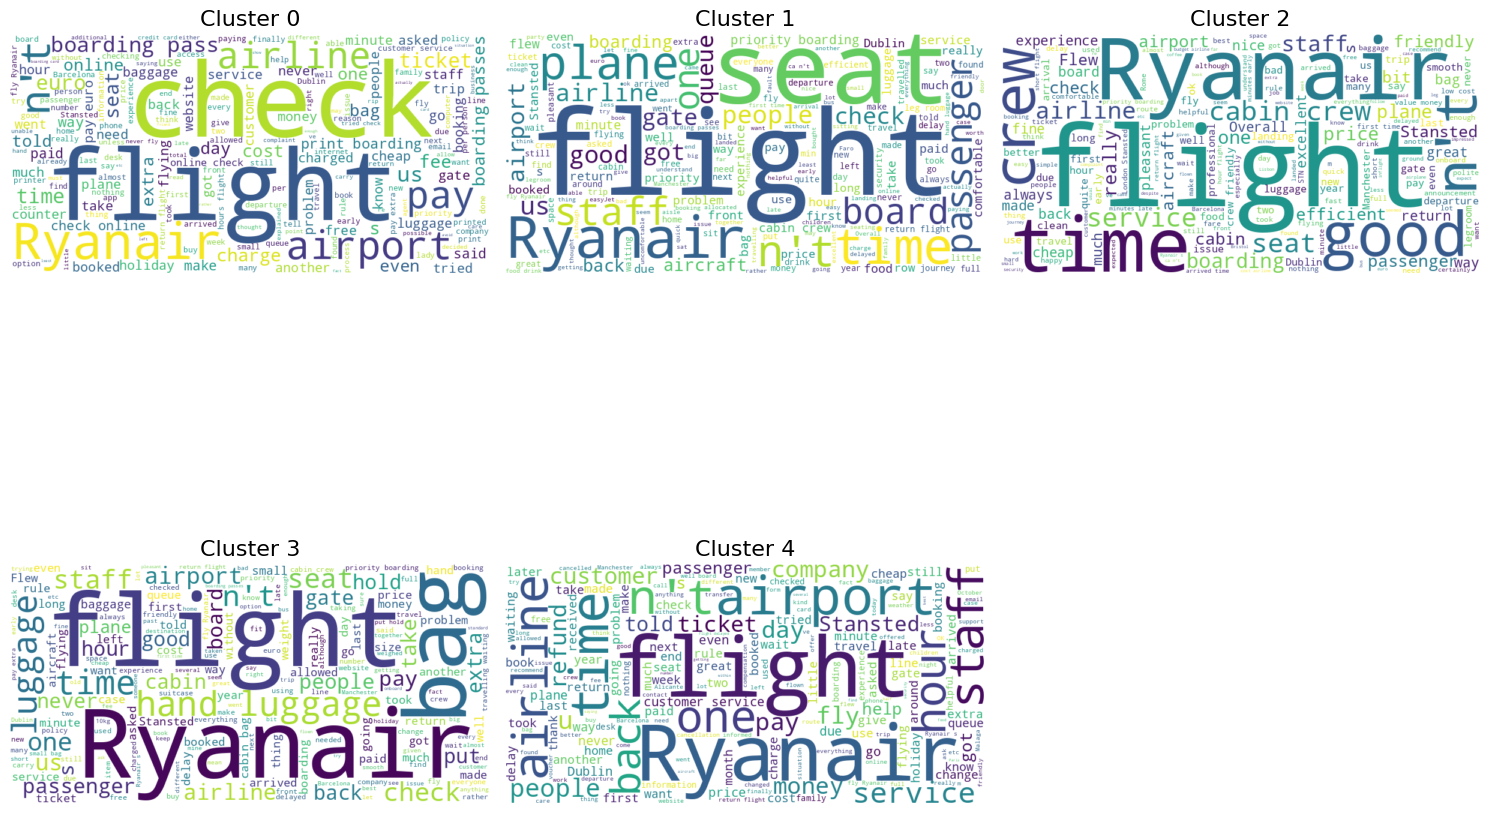

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Plot word clouds for each cluster
plt.figure(figsize=(15, 12))

# Generate and plot word clouds for each cluster
for i in range(5):  # Assuming there are 5 clusters
    # Get all reviews for the current cluster
    cluster_reviews = positive_reviews_df[positive_reviews_df['Cluster'] == i]['review']

    # Combine all reviews for the current cluster into a single text
    cluster_text = " ".join(cluster_reviews)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Plot the word cloud for the current cluster
    plt.subplot(2, 3, i+1)  # 2 rows and 3 columns for 5 clusters
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i}', fontsize=16)

plt.tight_layout()
plt.show()


<ipython-input-38-071270ccb031>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_df['Cluster'] = km.labels_


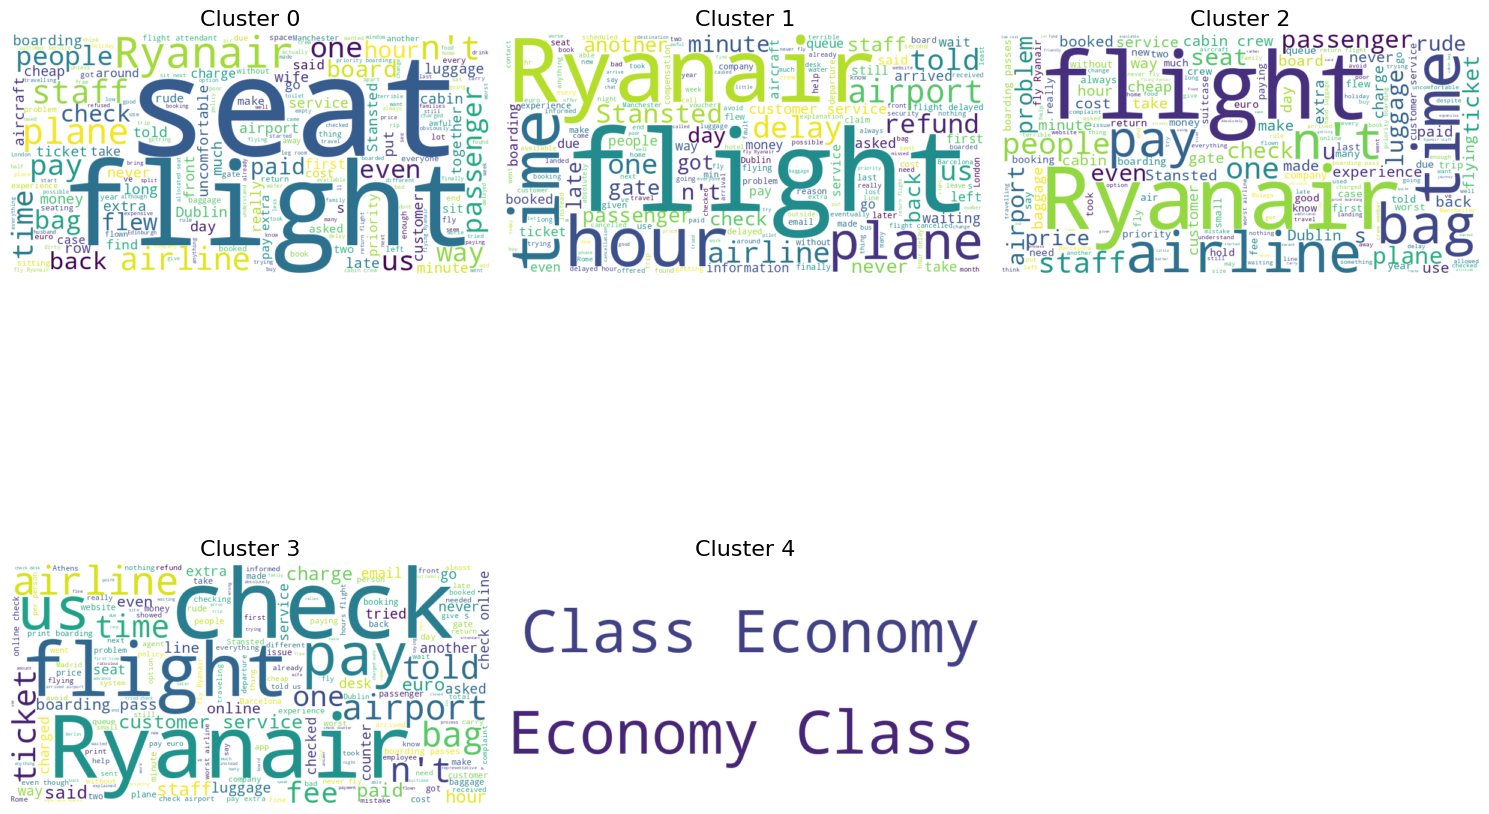

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter negative reviews based on compound score (compound <= 0.05)
negative_reviews_df = vaders[vaders['compound'] <= 0.05]  # Filter only negative reviews

# TF-IDF vectorization for negative reviews
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(negative_reviews_df['review'])  # Apply TF-IDF on negative reviews

# K-means clustering for negative reviews
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=30)
km.fit(tfidf_matrix)

# Add clusters to the DataFrame
negative_reviews_df['Cluster'] = km.labels_

# Plot word clouds for each cluster in negative reviews
plt.figure(figsize=(15, 12))

# Generate and plot word clouds for each cluster in negative reviews
for i in range(num_clusters):  # 5 clusters
    # Get all negative reviews for the current cluster
    cluster_reviews = negative_reviews_df[negative_reviews_df['Cluster'] == i]['review']

    # Combine all reviews for the current cluster into a single text
    cluster_text = " ".join(cluster_reviews)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Plot the word cloud for the current cluster
    plt.subplot(2, 3, i+1)  # 2 rows and 3 columns for 5 clusters
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i}', fontsize=16)

plt.tight_layout()
plt.show()


# Notation des avis basée sur les scores compound

In [ ]:
import pandas as pd

# Assuming your 'vaders' DataFrame contains the 'review' and 'compound' columns
# Create a function to classify sentiment
def classify_sentiment(compound_score):
    if compound_score > 0.05:
        return 'positive'
    else:
        return 'negative'

# Create a new DataFrame with 'review' and 'sentiment' columns
reviews_sentiment_df = vaders[['review', 'compound']].copy()  # Copy only the 'review' and 'compound' columns
reviews_sentiment_df['sentiment'] = reviews_sentiment_df['compound'].apply(classify_sentiment)  # Add sentiment

# Drop the 'compound' column if you don't want it in the new DataFrame
reviews_sentiment_df = reviews_sentiment_df.drop(columns=['compound'])

# Display the first few rows of the new DataFrame
print(reviews_sentiment_df.head())


                                              review sentiment
0  Flew back Faro London Luton Friday 2nd Februar...  positive
1  Another good affordable flight Ryanair . time ...  positive
2  Really impressed ! get pay , flight cost £19.9...  positive
3  like review flight Faro Liverpool Ryanair . bo...  positive
4  Flight left gate ahead schedule , fare really ...  positive


In [ ]:
reviews_sentiment_df['sentiment']=reviews_sentiment_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
df.head()

Column1 Date Published  Overall Rating Passenger Country  Trip_verified  \
0      0.0     03/02/2024            10.0    United Kingdom   Not Verified   
1      1.0     26/01/2024            10.0    United Kingdom  Trip Verified   
2      2.0     20/01/2024            10.0    United Kingdom  Trip Verified   
3      3.0     07/01/2024             6.0    United Kingdom  Trip Verified   
4      4.0     06/01/2024            10.0            Israel  Trip Verified   

                              Comment title  \
0         "bang on time and smooth flights"   
1          "Another good affordable flight"   
2                       “Really impressed!”   
3          “a decent offering from Ryanair”   
4  “cabin crew were welcoming and friendly”   

                                              review        Aircraft  \
0  Flew back Faro London Luton Friday 2nd Februar...  Boeing 737 900   
1  Another good affordable flight Ryanair . time ...             NaN   
2  Really impressed ! get pay , flight cost £19.9...  Boeing 737-800   
3  like review flight Faro Liverpool Ryanair . bo...      Boeing 737   
4  Flight left gate ahead schedule , fare really ...  Boeing 737-800   

  Type Of Traveller      Seat Type  ...     Destination  Date Flown  \
0    Family Leisure  Economy Class  ...           Luton  01/02/2024   
1    Couple Leisure  Economy Class  ...        Alicante  01/01/2024   
2    Couple Leisure  Economy Class  ...  Paris Beauvais  01/10/2023   
3      Solo Leisure  Economy Class  ...       Liverpool  01/01/2024   
4      Solo Leisure  Economy Class  ...      Manchester  01/01/2024   

  Seat Comfort  Cabin Staff Service Food & Beverages Ground Service  \
0          4.0                  5.0              3.0            4.0   
1          3.0                  5.0              3.0            5.0   
2          5.0                  5.0              4.0            5.0   
3          3.0                  2.0              1.0            3.0   
4          4.0                  5.0              NaN            4.0   

   Value For Money Recommended Inflight Entertainment  Wifi & Connectivity  
0              4.0         yes                    NaN                  NaN  
1              5.0         yes                    NaN                  NaN  
2              5.0         yes                    NaN                  NaN  
3              3.0         yes                    NaN                  NaN  
4              5.0         yes                    NaN                  NaN  

[5 rows x 21 columns]

In [ ]:
reviews_sentiment_df.head()

review  sentiment
0  Flew back Faro London Luton Friday 2nd Februar...          1
1  Another good affordable flight Ryanair . time ...          1
2  Really impressed ! get pay , flight cost £19.9...          1
3  like review flight Faro Liverpool Ryanair . bo...          1
4  Flight left gate ahead schedule , fare really ...          1

# **Analyse de Thèmes avec Modélisation de Sujet par LDA**

Nettoyage des Avis Clients (review)

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Définir les stopwords en anglais
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    text = str(text).lower()  # Convertir en minuscules
    text = re.sub(r'\d+', '', text)  # Supprimer les chiffres
    text = re.sub(r'\W+', ' ', text)  # Supprimer les caractères spéciaux
    text = re.sub(r'\s+', ' ', text).strip()  # Supprimer les espaces en trop
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Supprimer les stopwords
    return " ".join(words)

# Appliquer la fonction de nettoyage
df["clean_review"] = df["review"].apply(clean_text)

# Vérifier le nettoyage
df[["review", "clean_review"]].head()


review  \
0  Flew back Faro London Luton Friday 2nd Februar...   
1  Another good affordable flight Ryanair . time ...   
2  Really impressed ! get pay , flight cost £19.9...   
3  like review flight Faro Liverpool Ryanair . bo...   
4  Flight left gate ahead schedule , fare really ...   

                                        clean_review  
0  flew back faro london luton friday nd february...  
1  another good affordable flight ryanair time pl...  
2  really impressed get pay flight cost seats sof...  
3  like review flight faro liverpool ryanair book...  
4  flight left gate ahead schedule fare really ch...

# **Séparer les Avis Positifs et Négatifs**

In [ ]:
# Séparer les avis
df_pos = df[df['Overall Rating'] >= 6]  # Avis positifs (4 et 5 étoiles)
df_neg = df[df['Overall Rating'] <= 2]  # Avis négatifs (1 et 2 étoiles)

print(f"Avis positifs : {len(df_pos)}")
print(f"Avis négatifs : {len(df_neg)}")

Avis positifs : 831
Avis négatifs : 1039


# **Appliquer LDA sur les Avis Positifs**

In [ ]:
# Vectorisation des avis positifs
vectorizer_pos = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_pos = vectorizer_pos.fit_transform(df_pos['clean_review'])

# Appliquer LDA
lda_pos = LatentDirichletAllocation(n_components=5, random_state=42)
lda_pos.fit(X_pos)

# Afficher les topics des avis positifs
def display_topics(model, feature_names, num_words):
    for idx, topic in enumerate(model.components_):
        print(f"🔵 Topic {idx+1}: ", [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]])

display_topics(lda_pos, vectorizer_pos.get_feature_names_out(), 10)


🔵 Topic 1:  ['flight', 'ryanair', 'crew', 'time', 'boarding', 'cabin', 'stansted', 'friendly', 'th', 'helpful']
🔵 Topic 2:  ['flight', 'ryanair', 'staff', 'mins', 'check', 'airport', 'time', 'good', 'luggage', 'great']
🔵 Topic 3:  ['flight', 'ryanair', 'time', 'boarding', 'flights', 'crew', 'good', 'seats', 'return', 'cabin']
🔵 Topic 4:  ['flight', 'ryanair', 'airline', 'boarding', 'cost', 'people', 'pay', 'check', 'seat', 'fly']
🔵 Topic 5:  ['ryanair', 'flight', 'time', 'crew', 'staff', 'flights', 'cabin', 'seats', 'good', 'luggage']


# **Appliquer LDA sur les Avis Négatifs**

In [ ]:
# Vectorisation des avis négatifs
vectorizer_neg = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_neg = vectorizer_neg.fit_transform(df_neg['clean_review'])

# Appliquer LDA
lda_neg = LatentDirichletAllocation(n_components=5, random_state=42)
lda_neg.fit(X_neg)

# Afficher les topics des avis négatifs
print("\n🔴 **Topics des Avis Négatifs** 🔴")
display_topics(lda_neg, vectorizer_neg.get_feature_names_out(), 10)



🔴 **Topics des Avis Négatifs** 🔴
🔵 Topic 1:  ['ryanair', 'check', 'pay', 'flight', 'luggage', 'airline', 'bag', 'extra', 'staff', 'airport']
🔵 Topic 2:  ['flight', 'refund', 'flights', 'cancelled', 'ryanair', 'crew', 'covid', 'airline', 'money', 'voucher']
🔵 Topic 3:  ['ryanair', 'flight', 'flights', 'customer', 'pay', 'fly', 'service', 'seats', 'time', 'airline']
🔵 Topic 4:  ['ryanair', 'flight', 'boarding', 'service', 'check', 'online', 'refund', 'customer', 'email', 'pass']
🔵 Topic 5:  ['flight', 'ryanair', 'check', 'airport', 'time', 'hours', 'plane', 'staff', 'hour', 'told']


In [ ]:
!pip install pyldavis

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Visualisation des topics des avis positifs**

In [ ]:
import pyLDAvis
import pyLDAvis.lda_model # Import the lda_model submodule

# Visualisation des topics des avis positifs
vis_pos = pyLDAvis.lda_model.prepare(lda_pos, X_pos, vectorizer_pos) # Use lda_model instead of sklearn
pyLDAvis.display(vis_pos)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Visualisation des topics des avis négatifs**

In [ ]:
# Visualisation des topics des avis négatifs
vis_neg = pyLDAvis.lda_model.prepare(lda_neg, X_neg, vectorizer_neg) # Use lda_model instead of sklearn
pyLDAvis.display(vis_neg)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Régression ElasticNetCV - Analyse des mots importants**

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Préparation des données
X = df['clean_review']  # Colonne des avis (nettoyés)
y = df['Overall Rating']  # La note globale (cible)

# Vectorisation des reviews
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_vectorized = vectorizer.fit_transform(X)

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# ElasticNet avec validation croisée pour déterminer alpha et l1_ratio
elastic_net = ElasticNetCV(cv=5, random_state=42, max_iter=10000)
elastic_net.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = elastic_net.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"ElasticNetCV - Mean Squared Error: {mse}")
print(f"ElasticNetCV - R² Score: {r2}")

# Extraire les mots les plus importants
coef = elastic_net.coef_
indices_positive = coef.argsort()[-10:][::-1]  # 10 mots positifs
indices_negative = coef.argsort()[:10]  # 10 mots négatifs

# Afficher les mots importants
print("\n🔵 Top 10 Mots Positifs :")
for i in indices_positive:
    print(f"Mot: {vectorizer.get_feature_names_out()[i]}, Coefficient: {coef[i]}")

print("\n🔴 Top 10 Mots Négatifs :")
for i in indices_negative:
    print(f"Mot: {vectorizer.get_feature_names_out()[i]}, Coefficient: {coef[i]}")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ElasticNetCV - Mean Squared Error: 3.8369110719909805
ElasticNetCV - R² Score: 0.6732603363812528

🔵 Top 10 Mots Positifs :
Mot: thank, Coefficient: 8.642538633872379
Mot: excellent, Coefficient: 6.645913613154321
Mot: good, Coefficient: 6.043725594757269
Mot: great, Coefficient: 5.892576337079679
Mot: friendly, Coefficient: 5.517319902735913
Mot: early, Coefficient: 5.515133834533034
Mot: smooth, Coefficient: 5.300805890437303
Mot: problems, Coefficient: 5.123266053475861
Mot: pleasant, Coefficient: 5.091429279157415
Mot: efficient, Coefficient: 4.741492584873084

🔴 Top 10 Mots Négatifs :
Mot: rude, Coefficient: -5.430082673010505
Mot: terrible, Coefficient: -4.418781449669228
Mot: worst, Coefficient: -4.0059569372153865
Mot: hour, Coefficient: -3.7285748600485293
Mot: dirty, Coefficient: -3.708092687692839
Mot: unfriendly, Coefficient: -3.5524684478991753
Mot: poor, Coefficient: -3.3403910186386856
Mot: sat, Coefficient: -3.09355870755134
Mot: end, Coefficient: -3.0300592131267616
Mo

# **Visualisation des 10 Mots Positifs et Négatifs avec Coefficients**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


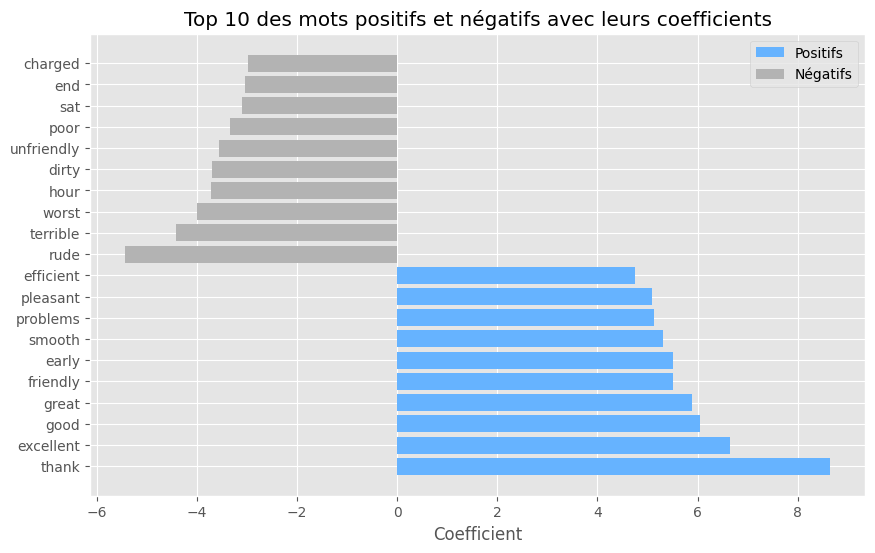

In [ ]:
import matplotlib.pyplot as plt

# Données
positive_words = [
    ('thank', 8.642538633872379),
    ('excellent', 6.645913613154321),
    ('good', 6.043725594757269),
    ('great', 5.892576337079679),
    ('friendly', 5.517319902735913),
    ('early', 5.515133834533034),
    ('smooth', 5.300805890437303),
    ('problems', 5.123266053475861),
    ('pleasant', 5.091429279157415),
    ('efficient', 4.741492584873084)
]

negative_words = [
    ('rude', -5.430082673010505),
    ('terrible', -4.418781449669228),
    ('worst', -4.0059569372153865),
    ('hour', -3.7285748600485293),
    ('dirty', -3.708092687692839),
    ('unfriendly', -3.5524684478991753),
    ('poor', -3.3403910186386856),
    ('sat', -3.09355870755134),
    ('end', -3.0300592131267616),
    ('charged', -2.9889048025461413)
]

# Séparer les mots et les coefficients
positive_words_list = [word for word, coef in positive_words]
positive_coeffs = [coef for word, coef in positive_words]

negative_words_list = [word for word, coef in negative_words]
negative_coeffs = [coef for word, coef in negative_words]

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Barres positives avec une couleur moderne et claire
ax.barh(positive_words_list, positive_coeffs, color='#66b3ff', label='Positifs')

# Barres négatives avec une couleur neutre et moderne
ax.barh(negative_words_list, negative_coeffs, color='#b3b3b3', label='Négatifs')

# Ajouter des labels et un titre
ax.set_xlabel('Coefficient')
ax.set_title('Top 10 des mots positifs et négatifs avec leurs coefficients')

# Ajouter la légende
ax.legend()

# Afficher le graphique
plt.show()


# Extraction de 10% des données pour la validation
Notation manuelle des 10% restants et division des données selon chaque modèle pour l'entrainement et le test


In [ ]:
import pandas as pd

# Assuming your DataFrame is called `reviews_sentiment_df`

# Extract 10% of the data
validation_df = reviews_sentiment_df.sample(frac=0.1, random_state=42)

# Drop the 10% data from the original dataset
remaining_df = reviews_sentiment_df.drop(validation_df.index)

# Export the 10% validation data to an Excel file
validation_df.to_excel('validation_data.xlsx', index=False)

# Optionally, export the remaining data as well
remaining_df.to_excel('remaining_data.xlsx', index=False)

print("Validation data exported to 'validation_data.xlsx'.")
print("Remaining data exported to 'remaining_data.xlsx'.")


Validation data exported to 'validation_data.xlsx'.
Remaining data exported to 'remaining_data.xlsx'.


In [ ]:
reviews_sentiment_df=remaining_df

In [ ]:
validation_df

review  sentiment
1640  flew ibiza husband 2 small children family hol...          1
508   Prague Barcelona . wanted check , realised cha...          0
1422  prepaid 20 kg baggage well seat selection . ch...          1
44    checked back app flight home gone . Ryanair re...          1
1398  Flew Edinburgh Brussels . airline 's business ...          1
...                                                 ...        ...
1905  FR505 Bristol UK Dublin IE August 19th . bad p...          1
1747  returning Lanzarote yesterday family ( 3 gener...          0
84    Uneventful flight . delays . Ryanair crew frie...          0
1744  Flew Luton Malta April 1st . Plane late arrivi...          0
1402  Nuremberg London Stansted . Watch `` 'll bring...          0

[230 rows x 2 columns]

In [ ]:
import pandas as pd
# Read in data
validation_df = pd.read_csv('validation_data -verified_manually.csv',delimiter=',')

In [ ]:
# Read in data
remaining_data = pd.read_excel('remaining_data.xlsx')


In [ ]:
reviews_sentiment_df=remaining_data

In [ ]:
reviews_sentiment_df

review  sentiment
0     Flew back Faro London Luton Friday 2nd Februar...          1
1     Another good affordable flight Ryanair . time ...          1
2     Really impressed ! get pay , flight cost £19.9...          1
3     like review flight Faro Liverpool Ryanair . bo...          1
4     Flight left gate ahead schedule , fare really ...          1
...                                                 ...        ...
2070  daughter took holiday Kos . never seen shamble...          1
2071  Stansted Pula . Tried adhere rules regulations...          0
2072  printing boarding tickets got outboard flight ...          0
2073  Budapest - Manchester back 5 month old 7 year ...          1
2074  Stansted Barcelona . Fine going . Horrendous t...          1

[2075 rows x 2 columns]

In [ ]:
validation_df

review  sentiment
0    flew ibiza husband 2 small children family hol...          0
1    Prague Barcelona . wanted check , realised cha...          0
2    prepaid 20 kg baggage well seat selection . ch...          1
3    checked back app flight home gone . Ryanair re...          0
4    Flew Edinburgh Brussels . airline 's business ...          0
..                                                 ...        ...
217  FR505 Bristol UK Dublin IE August 19th . bad p...          1
218  returning Lanzarote yesterday family ( 3 gener...          1
219  Uneventful flight . delays . Ryanair crew frie...          0
220  Flew Luton Malta April 1st . Plane late arrivi...          0
221  Nuremberg London Stansted . Watch `` 'll bring...          0

[222 rows x 2 columns]

# Préparation et Vectorisation des Données pour un Modèle CNN:

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Tokeniser les textes en mots individuels
text_data = reviews_sentiment_df['review']
tokenized_text = text_data.apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])
text_data_val=validation_df['review']
tokenized_text_val = text_data_val.apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

In [ ]:
from gensim.models import Word2Vec

# Entraîner le modèle Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model_val = Word2Vec(sentences=tokenized_text_val, vector_size=100, window=5, min_count=1, workers=4)

# Sauvegarder le modèle Word2Vec
word2vec_model.save("ML project/untitled.bin")
word2vec_model_val.save("ML project/word2vec_model_val.bin")

# Afficher quelques exemples de vecteurs de mots
for word in ['flight', 'service', 'delay']:
    if word in word2vec_model.wv:
        print(f"Vector for '{word}':\n{word2vec_model.wv[word]}")
    else:
        print(f"'{word}' not in vocabulary")

# Afficher quelques exemples de vecteurs de mots
for word in ['flight', 'service', 'delay']:
    if word in word2vec_model_val.wv:
        print(f"Vector for '{word}':\n{word2vec_model_val.wv[word]}")
    else:
        print(f"'{word}' not in vocabulary")


Vector for 'flight':
[-0.6704889   0.81879187  0.5869968   0.5560283  -0.5485375  -1.0222002
  0.06470412  1.9169174  -0.56286657 -0.5700982  -0.13575812 -1.5071082
 -0.06429701  0.37384912  0.45187876 -0.6327285   0.26193142 -0.7150742
 -0.09019855 -1.2315218   1.1273284   0.43041733  0.45676145 -0.14931527
  0.22990379  0.43911394 -0.61233884 -0.29448518 -0.73062795 -0.027835
 -0.08161555  0.10745361  0.1726293  -0.80881137 -0.46912295  1.3500472
  0.3553708  -0.6026304  -0.29021233 -1.0976826   0.20993838 -0.17319168
 -1.0203933  -0.1389454   0.77038676  0.27367163  0.00675839 -0.06556324
  0.57984275  0.47069725  0.15588501 -0.46376026 -0.19338296 -0.46099707
 -0.05695786 -0.03790377  0.16326416 -0.05070432 -0.7581282   0.65912455
  0.30074304  0.0577131  -0.22515786 -0.16561526 -0.96993303  0.6176942
  0.2062681   1.3251386  -0.83938634  1.6445855  -0.23197827  0.4619955
  0.9965759  -0.16037793  0.74793506  1.1049198  -0.35446465 -0.88477325
 -0.5181872   0.25690588 -0.9123458   

In [ ]:
#Importation des Bibliothèques Nécessaires
import pandas as pd
import string
import nltk
import joblib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, concatenate, Input
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

**Dans cette étape, nous préparons  les données pour les ensembles d'entraînement et de validation séparément**

In [ ]:
#Préparation des Données:
y = reviews_sentiment_df['sentiment']
y_val = validation_df['sentiment']
# Créer un dictionnaire de mots vers indices
word_to_index = {word: word2vec_model.wv.key_to_index[word] for word in word2vec_model.wv.index_to_key}
max_len = max(len(seq) for seq in tokenized_text)
X_seq = [[word_to_index[word] for word in seq if word in word_to_index] for seq in tokenized_text]

# Remplir les séquences pour qu'elles aient toutes la même longueur
X_pad = pad_sequences(X_seq, maxlen=max_len)

#for validation data

# Créer un dictionnaire de mots vers indices
word_to_index_val = {word: word2vec_model_val.wv.key_to_index[word] for word in word2vec_model_val.wv.index_to_key}
max_len_val = max(len(seq) for seq in tokenized_text_val)
X_seq_val = [[word_to_index_val[word] for word in seq if word in word_to_index_val] for seq in tokenized_text_val]

# Remplir les séquences pour qu'elles aient toutes la même longueur
X_pad_val = pad_sequences(X_seq_val, maxlen=max_len_val)

**Diviser en données d'entraînement et de test**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=40)
# Vérification des formes des ensembles de données
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Validation data is already prepared (X_pad_val, y_val)
print(f"Shape of X_val: {X_pad_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (1660, 413)
Shape of X_test: (415, 413)
Shape of y_train: (1660,)
Shape of y_test: (415,)
Shape of X_val: (222, 377)
Shape of y_val: (222,)


# Modélisation avec CNN :

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the necessary variables:
# X_train, X_val, X_test, y_train, y_val, y_test
# and the word2vec_model is already trained

# 1. Determine the maximum sequence length from the data
max_length = max(max(len(seq) for seq in X_train), max(len(seq) for seq in X_val), max(len(seq) for seq in X_test))

# 2. Pad the sequences to ensure they all have the same length
X_train_pad = pad_sequences(X_train, maxlen=max_length)
X_val_pad = pad_sequences(X_val, maxlen=max_length)
X_test_pad = pad_sequences(X_test, maxlen=max_length)

# 3. Define model parameters
vocab_size = len(word2vec_model.wv.key_to_index)
embedding_dim = 100  # Use the dimension of the word2vec embeddings
num_filters = 128
kernel_sizes = [3, 4, 5]
dropout_rate = 0.5
num_classes = 2  # Positive and Negative classes

# 4. Build the CNN model
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)

# Add batch normalization after the embedding layer
embedding_layer = BatchNormalization()(embedding_layer)

# Create convolutional layers
conv_layers = []
for kernel_size in kernel_sizes:
    conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')(embedding_layer)
    conv_layer = BatchNormalization()(conv_layer)  # Batch normalization after each convolution
    pooling_layer = GlobalAveragePooling1D()(conv_layer)  # Use average pooling
    conv_layers.append(pooling_layer)

# Concatenate the pooling layers
concatenated = concatenate(conv_layers, axis=1)
dropout = Dropout(dropout_rate)(concatenated)
dense = Dense(256, activation='relu')(dropout)
output_layer = Dense(num_classes, activation='softmax')(dense)

# 5. Create and compile the model
model_cnn = Model(inputs=input_layer, outputs=output_layer)
model_cnn.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Setup early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
lr_scheduler = LearningRateScheduler(lambda epoch: 0.0005 * np.exp(0.1 * epoch))

# 7. Train the model
history = model_cnn.fit(X_train_pad, y_train, epochs=50, validation_data=(X_val_pad, y_val),
                        batch_size=64, callbacks=[early_stopping, lr_scheduler])



Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 411ms/step - accuracy: 0.5471 - loss: 0.6912 - val_accuracy: 0.4189 - val_loss: 0.6973 - learning_rate: 5.0000e-04
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.6885 - loss: 0.6238 - val_accuracy: 0.4189 - val_loss: 0.7020 - learning_rate: 5.5259e-04
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.8286 - loss: 0.4169 - val_accuracy: 0.5811 - val_loss: 0.6833 - learning_rate: 6.1070e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - accuracy: 0.9526 - loss: 0.1857 - val_accuracy: 0.5856 - val_loss: 0.6858 - learning_rate: 6.7493e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.9789 - loss: 0.0757 - val_accuracy: 0.5811 - val_loss: 0.7035 - learning_rate: 7.4591e-04
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 394ms/step - accuracy: 0.9969 - loss: 0.0255 - val_accuracy: 0.5856 - val_loss: 0.7167 - learning_rate: 8.2436e-04


**Évaluation du modèle**









In [ ]:
# 8. Evaluate the model on validation data
y_val_pred = model_cnn.predict(X_val_pad)
y_val_pred = y_val_pred.argmax(axis=1)

# Print classification report for validation data
print("Classification Report on Validation Data:")
print(classification_report(y_val, y_val_pred))

# Calculate accuracy on validation data
accuracy_cnn = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on Validation Data: {accuracy_cnn:.4f}")



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       129
           1       1.00      0.01      0.02        93

    accuracy                           0.59       222
   macro avg       0.79      0.51      0.38       222
weighted avg       0.76      0.59      0.44       222

Accuracy on Validation Data: 0.5856


In [ ]:
# 9. Evaluate the model on test data
y_test_pred = model_cnn.predict(X_test)
y_test_pred = y_test_pred.argmax(axis=1)

# Print classification report for test data
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

# Calculate accuracy on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Data: {accuracy_test:.4f}")




13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.48      0.99      0.65       197
           1       0.88      0.03      0.06       218

    accuracy                           0.49       415
   macro avg       0.68      0.51      0.36       415
weighted avg       0.69      0.49      0.34       415

Accuracy on Test Data: 0.4892


# Préparation et Vectorisation des Données pour un Modèle SVM:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Préparation des données pour le SVM avec TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3083)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)  # Training data
X_tfidf_val = tfidf_vectorizer.transform(text_data_val)  # Validation data (use transform here, not fit_transform)

# Diviser les données en ensembles d'entraînement et de test pour le SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_tfidf, y, test_size=0.1, random_state=60)

# Entraîner le modèle SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_svm, y_train_svm)



SVC(kernel='linear', probability=True)

**Évaluation du modèle:**

In [ ]:
# Prédictions sur l'ensemble de validation
y_pred_svm_val = svm_model.predict(X_tfidf_val)

# Rapport de classification pour la validation
print("Évaluation du modèle SVM sur les données de validation :")
print(classification_report(y_val, y_pred_svm_val))

# Calculer et afficher l'accuracy sur les données de validation
accuracy_svm_val = accuracy_score(y_val, y_pred_svm_val)
print(f"Accuracy du modèle SVM sur les données de validation : {accuracy_svm_val:.4f}")



Évaluation du modèle SVM sur les données de validation :
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       129
           1       0.67      0.87      0.76        93

    accuracy                           0.77       222
   macro avg       0.78      0.78      0.77       222
weighted avg       0.79      0.77      0.77       222

Accuracy du modèle SVM sur les données de validation : 0.7658


In [ ]:
# Prédictions sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test_svm)

# Rapport de classification pour le test
print("Évaluation du modèle SVM sur les données de test :")
print(classification_report(y_test_svm, y_pred_svm))

# Calculer et afficher l'accuracy sur les données de test
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"Accuracy du modèle SVM sur les données de test : {accuracy_svm:.4f}")

Évaluation du modèle SVM sur les données de test :
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        93
           1       0.88      0.85      0.86       115

    accuracy                           0.85       208
   macro avg       0.85      0.85      0.85       208
weighted avg       0.85      0.85      0.85       208

Accuracy du modèle SVM sur les données de test : 0.8510


# Sauvegarder le modèle CNN et SVM et le vectoriseur TFIDF

In [ ]:
# Sauvegarder le modèle CNN
model_cnn.save("ML project/sentiment_analysis_model_cnn.h5")

# Sauvegarder le modèle SVM
joblib.dump(svm_model, "ML project/sentiment_analysis_model_svm.pkl")

# Sauvegarder le vectoriseur TF-IDF
joblib.dump(tfidf_vectorizer, "ML project/tfidf_vectorizer.pkl")

['ML project/tfidf_vectorizer.pkl']

In [ ]:
from tensorflow.keras.models import load_model
import joblib

# Load all saved models and vectorizer
model_cnn = load_model("ML project/sentiment_analysis_model_cnn.h5")
svm_model = joblib.load("ML project/sentiment_analysis_model_svm.pkl")
tfidf_vectorizer = joblib.load("ML project/tfidf_vectorizer.pkl")

print("All models and vectorizer loaded successfully!")


All models and vectorizer loaded successfully!


# Application web d’analyse des sentiments en utilisant SVM

**L'installation du flask :**

In [ ]:
!pip install Flask joblib pyngrok
!ngrok authtoken 2hEronsk8Vyc29l3hpv8Km7E5n9_5UKLpvcAqaxVVPj9vMpRc

Authtoken saved to configuration file: C:\Users\DELL\AppData\Local/ngrok/ngrok.yml


**L'application Flask :**

In [ ]:
from flask import Flask, request, jsonify, render_template_string
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from gensim.models import Word2Vec

app = Flask(__name__)

# Charger le modèle SVM et le modèle CNN
svm_model = joblib.load("ML project/sentiment_analysis_model_svm.pkl")
cnn_model = load_model("ML project/sentiment_analysis_model_cnn.h5")

# Charger le modèle Word2Vec
word2vec_model = Word2Vec.load("ML project/untitled.bin")

# Charger le vectoriseur TF-IDF
tfidf_vectorizer = joblib.load("ML project/tfidf_vectorizer.pkl")

# Charger les mots vides
stop_words = set(stopwords.words('english'))

# Fonction pour prétraiter le texte
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Fonction pour convertir le texte en vecteurs TF-IDF
def vectorize_text_tfidf(text):
    return tfidf_vectorizer.transform([text])

# Fonction pour convertir le texte en séquences de Word2Vec
def vectorize_text_w2v(tokens):
    word_to_index = {word: word2vec_model.wv.key_to_index[word] for word in word2vec_model.wv.index_to_key}
    max_len_cnn = 413  # Longueur maximale des séquences attendue par le modèle CNN
    seq = [word_to_index[word] for word in tokens if word in word_to_index]
    padded_seq = pad_sequences([seq], maxlen=max_len_cnn)
    return padded_seq

@app.route('/')
def home():
    return render_template_string('''
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Sentiment Analysis</title>
        </head>
        <body>
            <h1>Sentiment Analysis</h1>
            <form action="/predict" method="post">
                <label for="comment">Enter your comment:</label><br>
                <textarea id="comment" name="comment" rows="4" cols="50"></textarea><br>
                <input type="submit" value="Analyze Sentiment">
            </form>
            <div id="result"></div>
            <script>
                document.querySelector('form').onsubmit = async (e) => {
                    e.preventDefault();
                    const formData = new FormData(e.target);
                    console.log([...formData.entries()]); // Log submitted form data
                    try {
                        const response = await fetch('/predict', {
                            method: 'POST',
                            body: formData
                        });

                        if (!response.ok) {
                            const errorData = await response.json();
                            throw new Error(errorData.error || 'Unknown error');
                        }

                        const result = await response.json();
                        document.getElementById('result').innerHTML = `
                            <h2>Result:</h2>
                            <p>Comment: ${result.comment}</p>
                            <p>SVM Sentiment: ${result.sentiment_svm}</p>
                            <p>CNN Sentiment: ${result.sentiment_cnn}</p>
                        `;
                    } catch (error) {
                        document.getElementById('result').innerHTML = `
                            <h2>Error:</h2>
                            <p>${error.message}</p>
                        `;
                    }
                };
            </script>
        </body>
        </html>
    ''')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        comment = request.form.get('comment', None)
        if not comment:
            return jsonify({'error': 'No comment provided'}), 400

        print(f"Received comment: {comment}")  # Log the comment

        tokens = preprocess_text(comment)

        # SVM Prediction
        vectorized_text_tfidf = vectorize_text_tfidf(comment)
        prediction_svm = svm_model.predict(vectorized_text_tfidf)[0]
        sentiment_svm = 'Positive' if prediction_svm == 1 else 'Negative'

        # CNN Prediction
        vectorized_text_w2v = vectorize_text_w2v(tokens)
        prediction_cnn_prob = cnn_model.predict(vectorized_text_w2v)
        prediction_cnn = np.argmax(prediction_cnn_prob, axis=1)[0]
        sentiment_cnn = 'Positive' if prediction_cnn == 1 else 'Negative'

        return jsonify({
            'comment': comment,
            'sentiment_svm': sentiment_svm,
            'sentiment_cnn': sentiment_cnn,
        })
    except Exception as e:
        print(f"Error: {e}")
        return jsonify({'error': 'An error occurred', 'details': str(e)}), 500

if __name__ == "__main__":
    from pyngrok import ngrok
    # Set your authtoken
    ngrok.set_auth_token("2hEronsk8Vyc29l3hpv8Km7E5n9_5UKLpvcAqaxVVPj9vMpRc")
    # Use 'bind_tls' to specify the port and enable HTTPS
    public_url = ngrok.connect(5000, bind_tls=True)
    print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000/\"")
    app.run()


 * ngrok tunnel "NgrokTunnel: "https://08e4-41-248-35-41.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000/"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Jan/2025 17:41:02] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Jan/2025 17:41:02] "GET /favicon.ico HTTP/1.1" 404 -


Received comment: i really loved the flight with ryanair , everything was good , cabin crew were kind . thanks ryanair
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


INFO:werkzeug:127.0.0.1 - - [12/Jan/2025 17:41:50] "POST /predict HTTP/1.1" 200 -


Received comment: good good good good good good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


INFO:werkzeug:127.0.0.1 - - [12/Jan/2025 17:42:34] "POST /predict HTTP/1.1" 200 -


Received comment: good good good good good good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


INFO:werkzeug:127.0.0.1 - - [12/Jan/2025 17:42:35] "POST /predict HTTP/1.1" 200 -


Received comment: good good good good good good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


INFO:werkzeug:127.0.0.1 - - [12/Jan/2025 17:42:36] "POST /predict HTTP/1.1" 200 -


In [ ]:
from flask import Flask, request, jsonify, render_template_string
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from gensim.models import Word2Vec

app = Flask(__name__)

# Charger le modèle SVM et le modèle CNN
svm_model = joblib.load("ML project/sentiment_analysis_model_svm.pkl")
# cnn_model = load_model("ML project/sentiment_analysis_model_cnn.h5")

# Charger le modèle Word2Vec
# word2vec_model = Word2Vec.load("ML project/untitled.bin")

# Charger le vectoriseur TF-IDF
tfidf_vectorizer = joblib.load("ML project/tfidf_vectorizer.pkl")

# Charger les mots vides
stop_words = set(stopwords.words('english'))

# Fonction pour prétraiter le texte
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Fonction pour convertir le texte en vecteurs TF-IDF
def vectorize_text_tfidf(text):
    return tfidf_vectorizer.transform([text])

# # Fonction pour convertir le texte en séquences de Word2Vec
# def vectorize_text_w2v(tokens):
#     word_to_index = {word: word2vec_model.wv.key_to_index[word] for word in word2vec_model.wv.index_to_key}
#     max_len_cnn = 413  # Longueur maximale des séquences attendue par le modèle CNN
#     seq = [word_to_index[word] for word in tokens if word in word_to_index]
#     padded_seq = pad_sequences([seq], maxlen=max_len_cnn)
#     return padded_seq

@app.route('/')
def home():
    return render_template_string('''
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Sentiment Analysis</title>
        </head>
        <body>
            <h1>Sentiment Analysis</h1>
            <form action="/predict" method="post">
                <label for="comment">Enter your comment:</label><br>
                <textarea id="comment" name="comment" rows="4" cols="50"></textarea><br>
                <input type="submit" value="Analyze Sentiment">
            </form>
            <div id="result"></div>
            <script>
                document.querySelector('form').onsubmit = async (e) => {
                    e.preventDefault();
                    const formData = new FormData(e.target);
                    console.log([...formData.entries()]); // Log submitted form data
                    try {
                        const response = await fetch('/predict', {
                            method: 'POST',
                            body: formData
                        });

                        if (!response.ok) {
                            const errorData = await response.json();
                            throw new Error(errorData.error || 'Unknown error');
                        }

                        const result = await response.json();
                        document.getElementById('result').innerHTML = `
                            <h2>Result:</h2>
                            <p>Comment: ${result.comment}</p>
                            <p>SVM Sentiment: ${result.sentiment_svm}</p>

                        `;
                    } catch (error) {
                        document.getElementById('result').innerHTML = `
                            <h2>Error:</h2>
                            <p>${error.message}</p>
                        `;
                    }
                };
            </script>
        </body>
        </html>
    ''')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        comment = request.form.get('comment', None)
        if not comment:
            return jsonify({'error': 'No comment provided'}), 400

        print(f"Received comment: {comment}")  # Log the comment

        tokens = preprocess_text(comment)

        # SVM Prediction
        vectorized_text_tfidf = vectorize_text_tfidf(comment)
        prediction_svm = svm_model.predict(vectorized_text_tfidf)[0]
        sentiment_svm = 'Positive' if prediction_svm == 1 else 'Negative'

        # # CNN Prediction
        # vectorized_text_w2v = vectorize_text_w2v(tokens)
        # prediction_cnn_prob = cnn_model.predict(vectorized_text_w2v)
        # prediction_cnn = np.argmax(prediction_cnn_prob, axis=1)[0]
        # sentiment_cnn = 'Positive' if prediction_cnn == 1 else 'Negative'

        return jsonify({
            'comment': comment,
            'sentiment_svm': sentiment_svm,
            # 'sentiment_cnn': sentiment_cnn,
        })
    except Exception as e:
        print(f"Error: {e}")
        return jsonify({'error': 'An error occurred', 'details': str(e)}), 500

if __name__ == "__main__":
    from pyngrok import ngrok
    # Set your authtoken
    ngrok.set_auth_token("2hEronsk8Vyc29l3hpv8Km7E5n9_5UKLpvcAqaxVVPj9vMpRc")
    # Use 'bind_tls' to specify the port and enable HTTPS
    public_url = ngrok.connect(5000, bind_tls=True)
    print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000/\"")
    app.run()


 * ngrok tunnel "NgrokTunnel: "https://79db-41-248-35-41.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000/"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Jan/2025 17:45:23] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Jan/2025 17:45:30] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Jan/2025 17:45:41] "POST /predict HTTP/1.1" 200 -


Received comment: i really loved the flight with ryanair , everything was good , cabin crew were kind . thanks ryanair
